In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep=';')
print("Number of rows and columns:", df.shape)

Number of rows and columns: (4424, 37)


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [173]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())  # Count how many duplicate rows there are

0


In [175]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [177]:
print(df['Inflation rate'].describe())  # Example for a specific column

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64


In [179]:
high_grade_students = df[df['Admission grade'] > 15]
print(high_grade_students.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [187]:
# Convert 'Target' into a binary value (Graduate = 1, Dropout = 0)
df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0})

# Select numerical columns of interest for correlation analysis
numerical_cols = [
    'Previous qualification (grade)', 'Admission grade', 
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
    'Mother\'s qualification', 'Father\'s qualification', 
    'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
correlation_matrix[['Target']].sort_values(by='Target', ascending=False)


,Target
Target,1.000000
Curricular units 2nd sem (grade),0.605350
Curricular units 1st sem (grade),0.519927
Admission grade,0.128058
Previous qualification (grade),0.109464
GDP,0.050260
Unemployment rate,0.004198
Father's qualification,-0.005865
Inflation rate,-0.030326
Mother's qualification,-0.053989


In [165]:
##Interpretation:
# Target (1.0): The target is perfectly correlated with itself, so this value is always 1.

# Curricular units 2nd sem (grade) (0.605): This means there is a positive correlation of 0.605 between the grades a student achieved in the second semester and their likelihood of graduating. The higher the grade, the more likely they are to graduate. A correlation above 0.5 suggests a strong relationship.

# Curricular units 1st sem (grade) (0.52): Similarly, there is a moderately strong positive correlation (0.52) between first-semester grades and graduation likelihood. Higher first-semester grades also make graduation more likely.

# Admission grade (0.13): There is a weak positive correlation (0.13) between the admission grade and graduation. This indicates that admission grades don’t have a strong impact on whether a student graduates.

# Previous qualification (grade) (0.11): The correlation between the grades of the student’s previous qualification and their likelihood of graduation is also weak (0.11).

# GDP (0.05): There is a very weak positive correlation (0.05) between the GDP and a student's likelihood of graduating. This suggests that the economic environment (as measured by GDP) doesn't strongly affect graduation rates.

# Unemployment rate (0.004): The correlation between the unemployment rate and graduation likelihood is almost zero, meaning no meaningful relationship.

# Father's qualification (-0.006), Inflation rate (-0.03), Mother's qualification (-0.05): These features have negative or near-zero correlations, meaning there is little to no association between parental qualifications or inflation rates and a student’s likelihood of graduating.

# What This Means:
# The strongest predictors of graduation are a student's grades, especially in the second semester.
# Parental education, economic conditions (like unemployment, inflation), and admission grades have little impact on the likelihood of graduating.

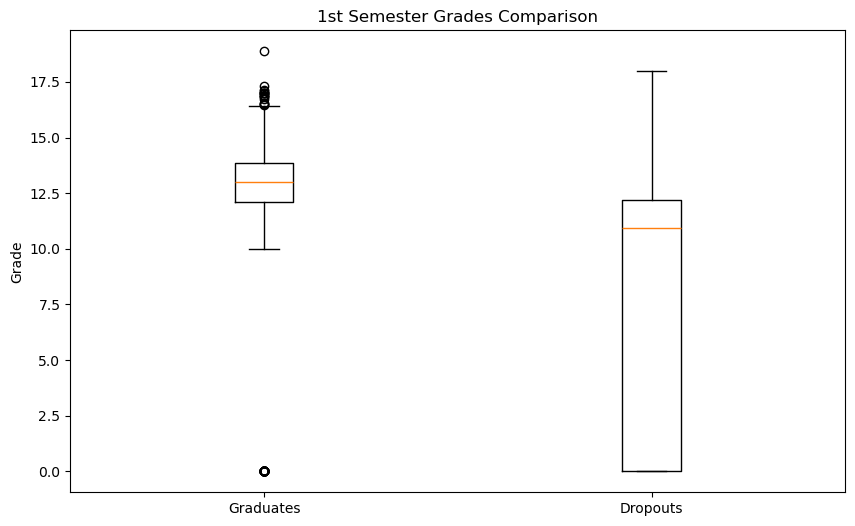

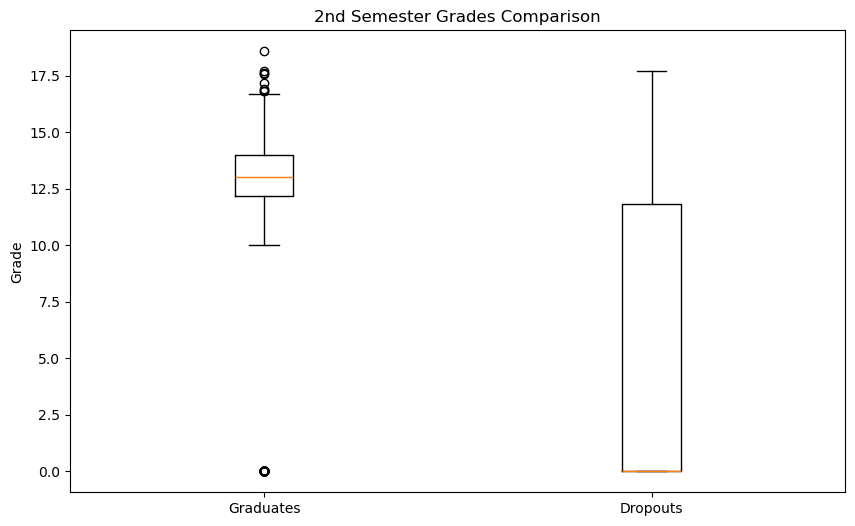

In [49]:
# Boxplot for 1st semester grades
plt.figure(figsize=(10,6))
plt.boxplot([graduates['Curricular units 1st sem (grade)'], dropouts['Curricular units 1st sem (grade)']], 
            labels=['Graduates', 'Dropouts'])
plt.title('1st Semester Grades Comparison')
plt.ylabel('Grade')
plt.show()

# Boxplot for 2nd semester grades
plt.figure(figsize=(10,6))
plt.boxplot([graduates['Curricular units 2nd sem (grade)'], dropouts['Curricular units 2nd sem (grade)']], 
            labels=['Graduates', 'Dropouts'])
plt.title('2nd Semester Grades Comparison')
plt.ylabel('Grade')
plt.show()


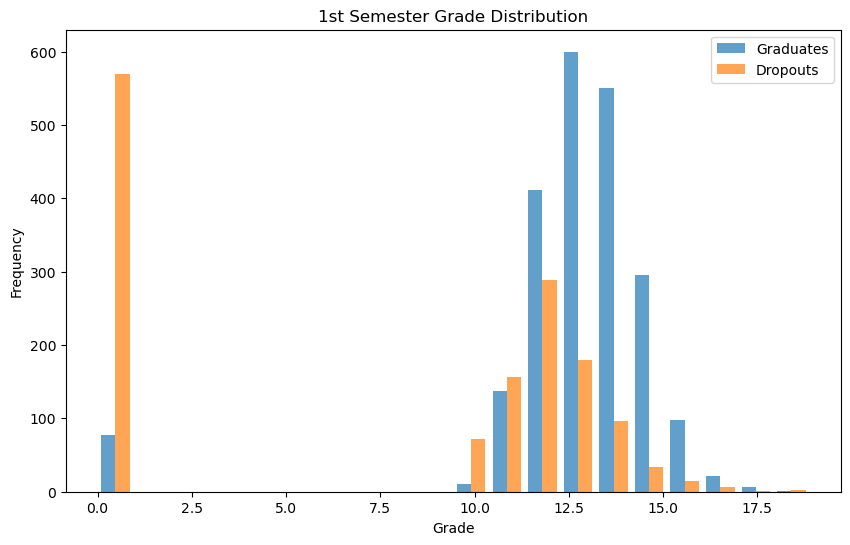

In [53]:
# Histogram for 1st semester grades
plt.figure(figsize=(10,6))
plt.hist([graduates['Curricular units 1st sem (grade)'], dropouts['Curricular units 1st sem (grade)']], 
         label=['Graduates', 'Dropouts'], bins=20, alpha=0.7)
plt.title('1st Semester Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

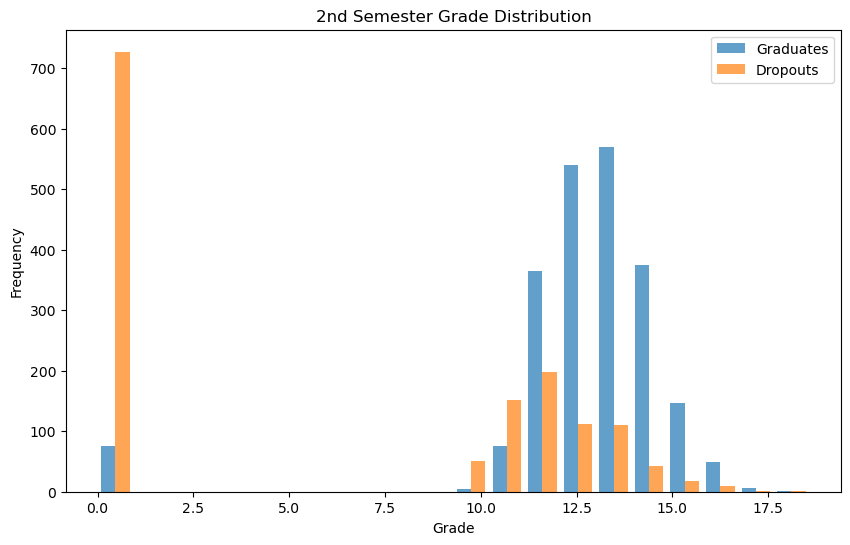

In [73]:
plt.figure(figsize=(10,6))
# plt.hist([graduates['Curricular units 2nd sem (grade)'], dropouts['Curricular units 2nd sem (grade)']], 
#             labels=['Graduates', 'Dropouts'], bins=20, alpha=0.7)
plt.hist([graduates['Curricular units 2nd sem (grade)'], dropouts['Curricular units 2nd sem (grade)']], 
         label=['Graduates', 'Dropouts'], bins=20, alpha=0.7)
plt.title('2nd Semester Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()